In [70]:
import pandas as pd
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Mushroom Dataset

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Load data

In [8]:
DATA_URL = "https://raw.githubusercontent.com/chainer/chainer/master/examples/glance/mushrooms.csv"


In [9]:
df = pd.read_csv(DATA_URL)

# Data exploration

In [10]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [12]:
df.shape

(8124, 23)

# Data Preprocessing-Label Encoding

In [13]:
mapping = list()
encoder = LabelEncoder()

In [14]:
for column in range(len(df.columns)):
    df[df.columns[column]] = encoder.fit_transform(df[df.columns[column]])
    mapping_dict = { index:label for index, label in enumerate(encoder.classes_) }
    mapping.append(mapping_dict)

In [15]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [16]:
mapping

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

In [17]:
x = df.drop("class", axis=1)

In [18]:
y = df["class"]

In [19]:
scaler = StandardScaler()

In [20]:
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [21]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730


# Split data into x and y

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Make Models

In [28]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

### Random Forest

In [31]:
rf = RandomForestClassifier()

In [32]:
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [2, 5, 10, 20],
    "min_samples_split": [2, 5, 10, 20],
}

In [33]:
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=kfold,
    n_jobs=-1,
)

In [54]:
start_time = time.time()
grid.fit(x_train, y_train)
end_time = time.time()

In [55]:
f"Training time: {end_time - start_time} seconds"

'Training time: 17.586930990219116 seconds'

In [56]:
grid.best_score_

np.float64(1.0)

In [57]:
grid.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

### Logistic Regression

In [37]:
lrmodel = LogisticRegression()

In [42]:
param_grid_lr = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    "class_weight": [None, "balanced"],
}

In [43]:
grid_lr = GridSearchCV(
    estimator=lrmodel,
    param_grid=param_grid_lr,
    cv=kfold,
    n_jobs=-1,
)

In [58]:
start_time = time.time()
grid_lr.fit(x_train, y_train)
end_time = time.time()

In [59]:
f"Training time: {end_time - start_time} seconds"

'Training time: 1.2334542274475098 seconds'

In [45]:
grid_lr.best_score_

np.float64(0.9698407058684195)

In [46]:
grid_lr.best_params_

{'C': 100, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

### Support Vector Classifier

In [47]:
svmmodel = SVC()

In [48]:
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'class_weight': [None, 'balanced']
}

In [49]:
grid_svc = GridSearchCV(
    estimator=svmmodel,
    param_grid=param_grid_svc,
    cv=kfold,
    n_jobs=-1,
)

In [60]:
start_time = time.time()
grid_svc.fit(x_train, y_train)
end_time = time.time()

In [61]:
f"Training time: {end_time - start_time} seconds"

'Training time: 100.20773887634277 seconds'

In [51]:
grid_svc.best_score_

np.float64(1.0)

In [52]:
grid_svc.best_params_

{'C': 1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}

# Models evaluation

In [62]:
y_predict_rf = grid.predict(x_test)

In [63]:
accuracy_score(y_test, y_predict_rf)

1.0

In [65]:
y_predict_lr = grid_lr.predict(x_test)

In [66]:
accuracy_score(y_test, y_predict_lr)

0.9723076923076923

In [68]:
svm_y_predict = grid_svc.predict(x_test)

In [69]:
accuracy_score(y_test, svm_y_predict)

1.0

# Confusion matrices

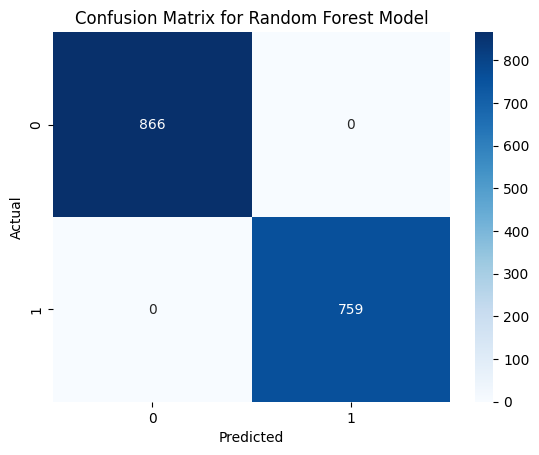

In [73]:
cm = confusion_matrix(y_test, y_predict_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

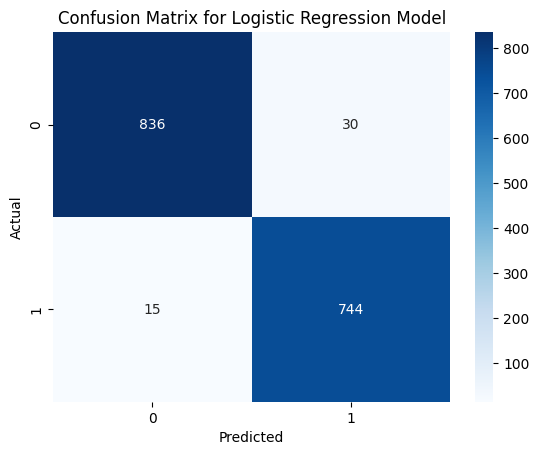

In [74]:
cm = confusion_matrix(y_test, y_predict_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()

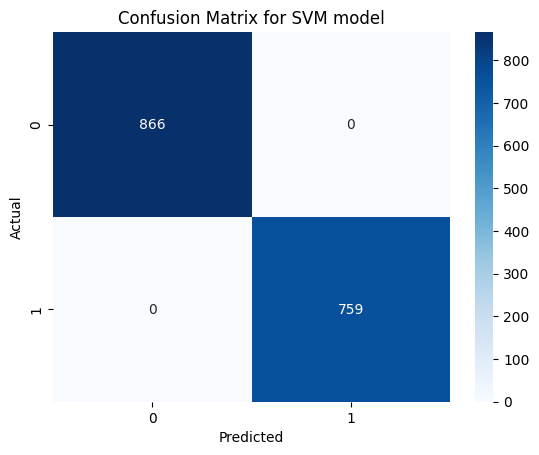

In [75]:
cm = confusion_matrix(y_test, svm_y_predict)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM model")
plt.show()

## Investigate feature importances

In [78]:
best_rf = grid.best_estimator_

In [85]:
importances = best_rf.feature_importances_

pd_importances = pd.Series(importances, x_train.columns)

In [87]:
pd_importances.sort_values(ascending=False)

odor                        0.165231
spore-print-color           0.114872
gill-size                   0.110886
gill-color                  0.087736
ring-type                   0.077820
gill-spacing                0.062157
bruises                     0.058786
population                  0.056817
stalk-root                  0.055803
stalk-surface-below-ring    0.043379
stalk-surface-above-ring    0.035575
habitat                     0.031107
stalk-color-above-ring      0.019052
stalk-shape                 0.017901
stalk-color-below-ring      0.014714
cap-color                   0.013576
ring-number                 0.012961
cap-surface                 0.008102
veil-color                  0.005531
cap-shape                   0.005340
gill-attachment             0.002654
veil-type                   0.000000
dtype: float64